# Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## About

The purpose of this notebook is to conduct a time series analysis of air quality around the Thomas Fire burn area. The goal is to visualize the impact of the Thomas Fire on air quality.

## Highlights
This notebook will demonstrate the following:
- Time series analysis of air quality data
- Data visualization of time series analysis

## Data
**Air Quality Index (AQI)**: This data was retrieved from the [US Environmental Protection Agency](https://www.epa.gov). It contains air quality data throughout the US, and we subset this dataset for Santa Barbara County.

## COMPLETE WORKFLOW


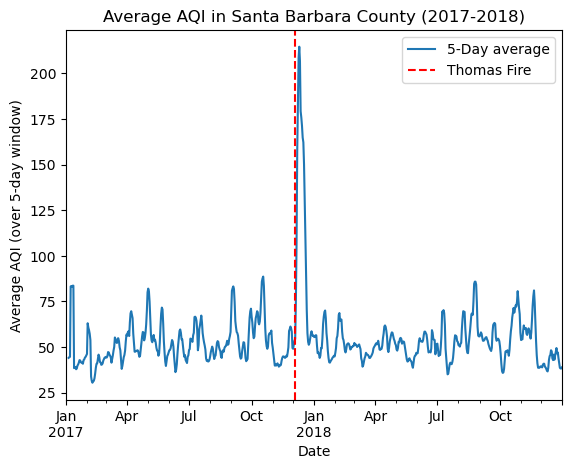

In [1]:
# COMPLETE WORKFLOW

# Import pandas and matplot libwith general abbreviation
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression='zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression='zip')

# Combine aqi_17 and aqi_18 observations
aqi = pd.concat([aqi_17, aqi_18])

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))
               
# Locate observations where county_name == Santa Barbara then store it as a copy in aqi_sb
aqi_sb = aqi.loc[aqi.county_name=='Santa Barbara'].copy()
               
               
# Convert date column of aqi_sb to datetime type
aqi_sb.date = pd.to_datetime(aqi_sb.date)
               
# Set the data column as the index then reassign it back to aqi_sb
aqi_sb = aqi_sb.set_index('date')

# Calculate AQI rolling average over 5 day window
rolling_average = aqi_sb.aqi.rolling(window = 5).mean()
               
# Create new column in aqi_sb called five_day_average and attach rolling_average series
aqi_sb['five_day_average'] = rolling_average
               
# Create line plot for AQI levels over time for Santa Barbara (2017-2018)
plot = (aqi_sb.plot(kind='line', y='five_day_average', label = "5-Day average"))

# Set title, xlabel, and ylabel for plot
plot.set_title("Average AQI in Santa Barbara County (2017-2018)")
plot.set_xlabel("Date")
plot.set_ylabel("Average AQI (over 5-day window)")

# Add a vertical line on December 4, 2017 which was beginning of Thomas Fire
plt.axvline(x=pd.to_datetime("2017-12-04"), color='red', linestyle='--', label = "Thomas Fire")
plt.legend()